In [1]:
import pandas as pd

df=pd.read_csv('cars.csv')

X=df[['Weeks']]
y=df['Total']

from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X,y)

print('intercept =', model.intercept_.round(2))
print('Coefficients =', model.coef_.round(2))

intercept = 115.99
Coefficients = [0.53]


In [2]:
y_pred=model.predict(X)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print ('MSE :', mean_squared_error(y_pred, y))
print ('RMSE :', math.sqrt(mean_squared_error(y_pred, y)))
print ('MAE :', mean_absolute_error(y_pred, y))

MSE : 1915.7821203188573
RMSE : 43.76964839153791
MAE : 37.40842605663041


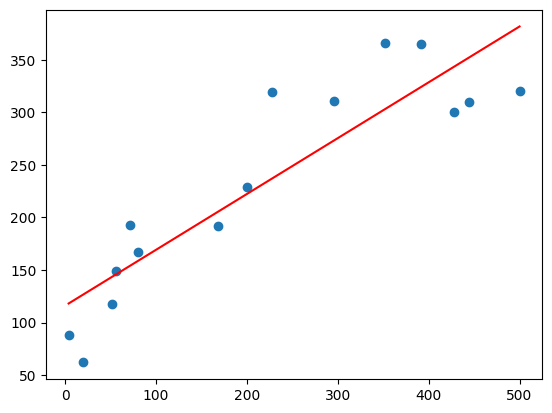

In [3]:
df['prediction']=model.predict(X)

import matplotlib.pyplot as plt

plt.scatter(df['Weeks'],df['Total'])
plt.plot(df['Weeks'],df['prediction'],color='red')
plt.show()

In [4]:
from sklearn.preprocessing import PolynomialFeatures

polynomial=PolynomialFeatures(degree=2,include_bias=False)

XNew=polynomial.fit_transform(X)
XNew

array([[4.00000e+00, 1.60000e+01],
       [2.00000e+01, 4.00000e+02],
       [5.20000e+01, 2.70400e+03],
       [5.60000e+01, 3.13600e+03],
       [7.20000e+01, 5.18400e+03],
       [8.00000e+01, 6.40000e+03],
       [1.68000e+02, 2.82240e+04],
       [2.00000e+02, 4.00000e+04],
       [2.28000e+02, 5.19840e+04],
       [2.96000e+02, 8.76160e+04],
       [3.52000e+02, 1.23904e+05],
       [3.92000e+02, 1.53664e+05],
       [4.28000e+02, 1.83184e+05],
       [4.44000e+02, 1.97136e+05],
       [5.00000e+02, 2.50000e+05]])

In [5]:
model2=LinearRegression()
model2.fit(XNew,y)

print('intercept =', model.intercept_)
print('Coefficients =', model.coef_)

intercept = 115.99495038611641
Coefficients = [0.53131098]


In [6]:
y_pred2=model2.predict(XNew)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

print ('MSE :', mean_squared_error(y_pred2, y))
print ('RMSE :', math.sqrt(mean_squared_error(y_pred2, y)))
print ('MAE :', mean_absolute_error(y_pred2, y))

MSE : 812.2825725792524
RMSE : 28.500571443029916
MAE : 24.62724256032611


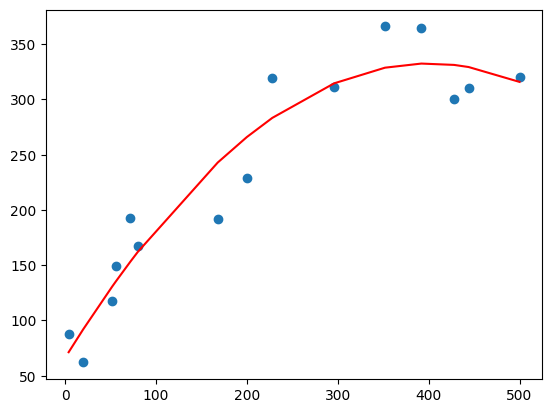

In [7]:
df['prediction2']=model2.predict(XNew)

import matplotlib.pyplot as plt

plt.scatter(df['Weeks'],df['Total'])
plt.plot(df['Weeks'],df['prediction2'],color='red')
plt.show()

In [8]:
weeks=[[510]]

newWeeks=polynomial.fit_transform(weeks)

print(model2.predict(newWeeks))

[312.34406067]


In [9]:
y_pred=model2.intercept_+model2.coef_[0]*weeks[0][0]+model2.coef_[1]*weeks[0][0]*weeks[0][0]
print(y_pred)

312.3440606725929
